<div style="background-color: #f0f8ff; padding: 20px; border-radius: 10px; border: 1px solid #d3d3d3; text-align: center">

<h1 style="color: #1f4e79; font-size: 50px;">💳 Credit Scoring with Machine Learning</h1>

</div>


<p style="font-size: 16px; color: #444;">
This project focuses on developing a <b>Credit Scoring Model</b> to predict the 
<b>creditworthiness</b> of individuals based on historical financial data. 
We utilize various <b>classification algorithms</b>, evaluate performance through 
<b>cross-validation</b>, and aim to build a reliable predictive model that can 
assist in financial decision-making.
</p>

## 📊 Credit Risk Dataset

This dataset contains information to predict the creditworthiness of individuals based on their historical financial data. It includes several features related to the individual's income, loan details, and credit history. You can access the dataset on [Kaggle here](https://www.kaggle.com/datasets/laotse/credit-risk-dataset).

### Column Breakdown:

| Column Name                       | Description                                                                 |
|------------------------------------|-----------------------------------------------------------------------------|
| **person_age**                     | The age of the individual applying for the loan.                             |
| **person_income**                  | The annual income of the person.                                            |
| **person_home_ownership**          | The home ownership status (e.g., RENT, OWN, MORTGAGE).                      |
| **person_emp_length**              | The length of time (in years) the person has been employed.                 |
| **loan_intent**                    | The intended purpose of the loan (e.g., PERSONAL, EDUCATION, MEDICAL).       |
| **loan_grade**                     | The grade assigned to the loan based on creditworthiness (e.g., A, B, C, D). |
| **loan_amnt**                      | The loan amount requested by the individual.                                |
| **loan_int_rate**                  | The interest rate of the loan.                                              |
| **loan_status**                    | The status of the loan (0 for default, 1 for paid back).                    |
| **loan_percent_income**            | The percentage of the person’s income that the loan represents.             |
| **cb_person_default_on_file**      | Indicates whether the person has a default record on file (Y for yes, N for no). |
| **cb_person_cred_hist_length**     | The length of the person’s credit history (in years).                       |

### Key Points:
- The **loan status** column (`loan_status`) is the target variable in this dataset, where:
    - `1`: Loan was paid off successfully.
    - `0`: Loan defaulted.
- The dataset includes both numerical (like `person_income`, `loan_amnt`) and categorical data (like `person_home_ownership`, `loan_intent`), which can be used for classification.
- This dataset is ideal for building and evaluating credit scoring models to assess the risk of loan defaults.

You can use this dataset to train machine learning models to predict creditworthiness based on the provided features. This will help financial institutions in making informed decisions about loan approvals and assessing risk.



## 📚 Importing Libraries

In this step, we import all the necessary libraries for data processing, model training, and evaluation. These libraries include:

- **Pandas & NumPy**: For data manipulation and numerical operations.
- **Matplotlib & Seaborn**: For data visualization.
- **Scikit-learn**: For various machine learning algorithms, model evaluation, and preprocessing techniques.
- **XGBoost**: For the XGBoost classifier.
- **Joblib**: For saving and loading the model.
- **Warnings**: To filter any unwanted warnings during the execution.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from xgboost import XGBClassifier

import joblib

import warnings
warnings.filterwarnings("ignore")

 
## Load Dataset 

In [2]:
# Step 1: Load Dataset
df = pd.read_csv('/kaggle/input/credit-risk-dataset/credit_risk_dataset.csv')  # Replace with the actual dataset path


In [3]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


Checking the Shape of the Dataset

In [4]:
df.shape

(32581, 12)

Checking the Information about the Dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [6]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


Checking duplicates values in the Dataset

In [7]:
 df.duplicated().sum()


165

We have identified that there are **165 duplicated rows** in the dataset. 

In [8]:
data=df.drop_duplicates()

In [9]:
data.duplicated().sum()

0

After dropping the duplicated rows, we have verified the dataset and found that there are now **0 duplicated rows** remaining.

## Missing Values Check - Result



In [10]:
data.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              887
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3095
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


As seen, there are missing values in the **person_emp_length** and **loan_int_rate** columns that need to be handled before further analysis or modeling.


## Handling Missing Values

To address the missing data:

- The **person_emp_length** column was filled using the median value.
- The **loan_int_rate** column was filled using the mean value.



In [11]:
data['person_emp_length'].fillna(data['person_emp_length'].median(), inplace=True)
data['loan_int_rate'].fillna(data['loan_int_rate'].mean(), inplace=True)


After handling these missing values, we performed a second check and found that there are now **0 missing values** in the entire dataset. The data is now complete and ready for further processing.


In [12]:
data.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [13]:
## Finding the numerical and categorical columns
cat_cols = [feature for feature in data.columns if data[feature].dtypes == 'O']
num_cols = [feature for feature in data.columns if feature not in cat_cols]


## Distribution of Numerical Features

We plotted histograms for all numerical features to observe their distributions. This visualization helps us understand the general shape, range, and frequency of the data values for each numerical column in the dataset.


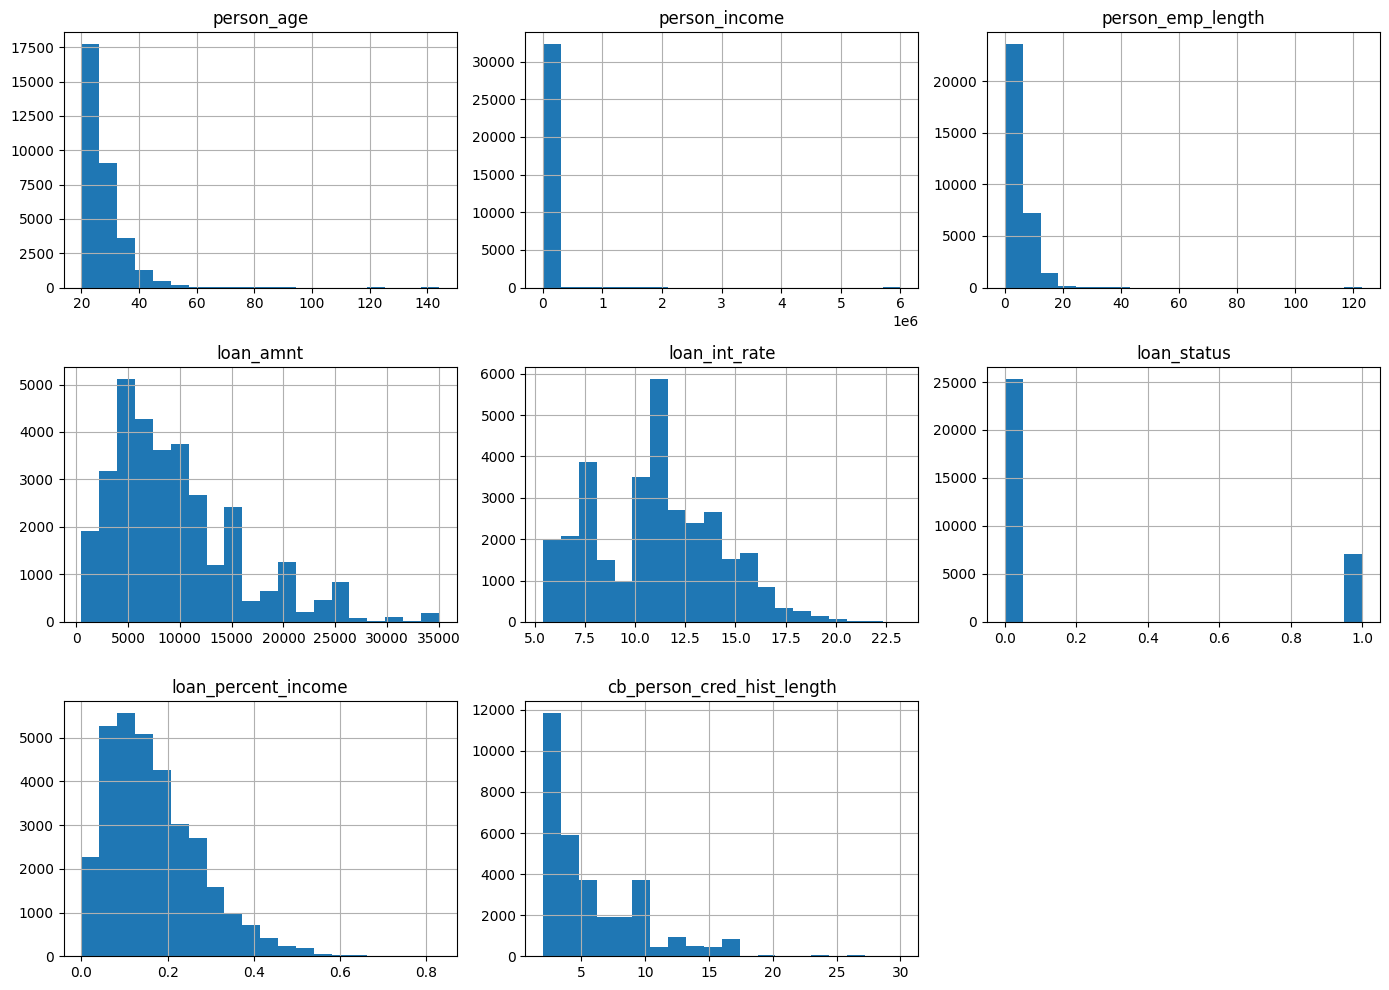

In [14]:
# Histogrammes pour les variables numériques
data.hist(bins=20, figsize=(14,10))
plt.tight_layout()
plt.show()

## Distribution of Categorical Features

We visualized the distribution of each categorical feature using pie charts. These charts provide a clear view of the proportion of each category within the respective columns, making it easier to understand the composition of the dataset for variables such as home ownership, loan intent, loan grade, and others.


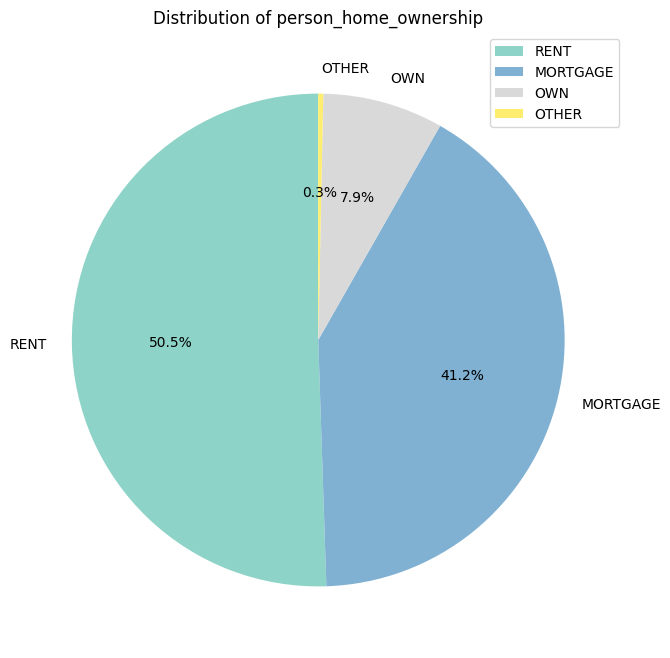

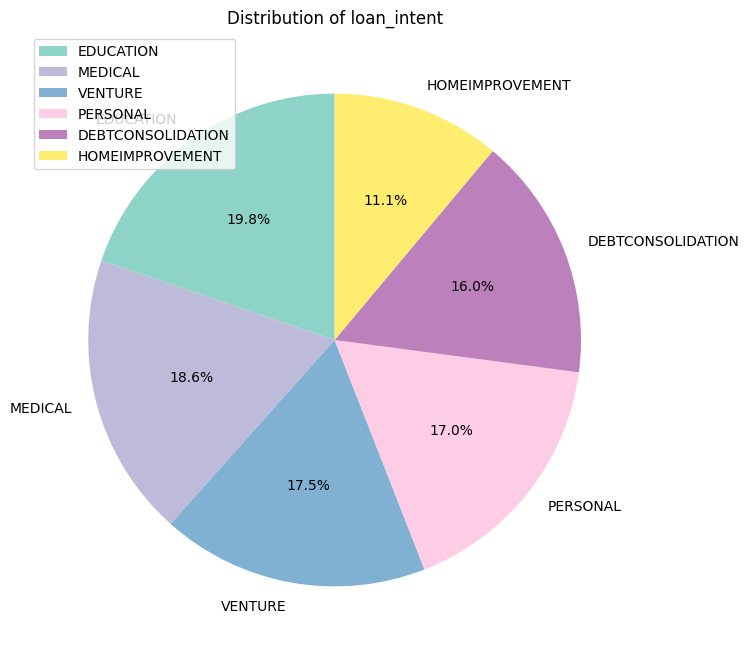

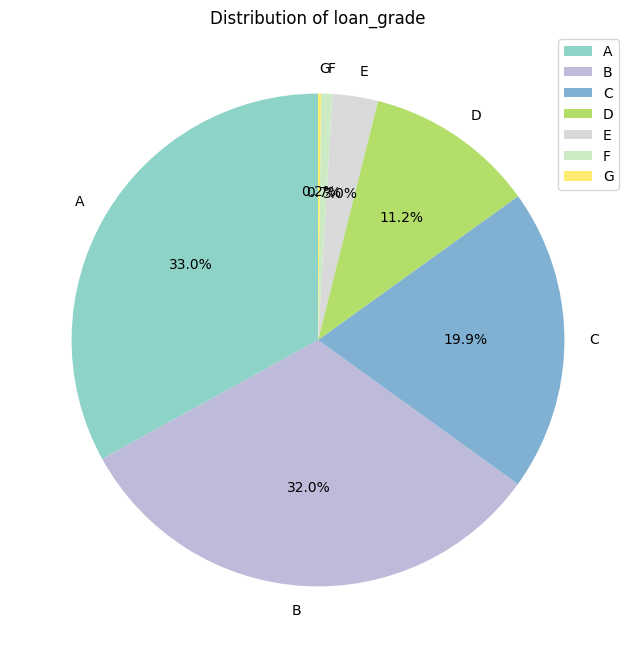

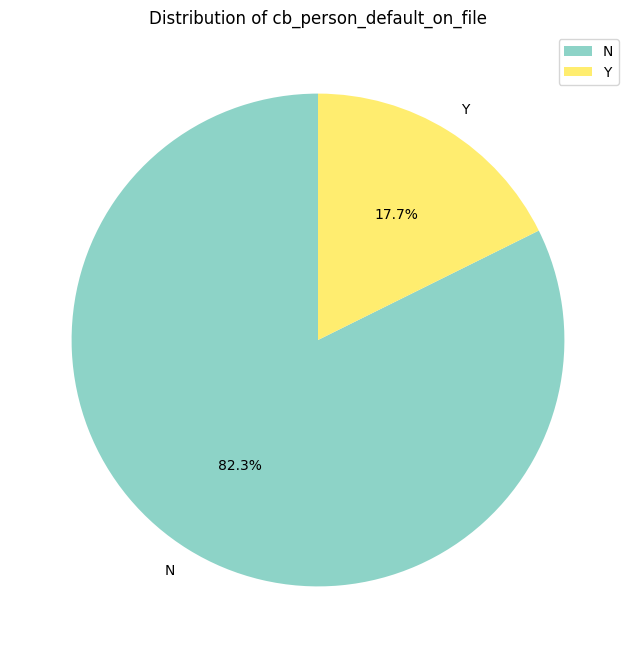

In [15]:
for col in cat_cols:
    # Comptez les occurrences de chaque catégorie
    counts = data[col].value_counts()
    
    # Créez le diagramme circulaire
    plt.figure(figsize=(8, 8))
    counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set3', legend=True)
    
    # Ajoutez un titre
    plt.title(f'Distribution of {col}')
    
    # Affichez le graphique
    plt.ylabel('')  # Enlève le label de l'axe des y pour un affichage plus propre
    plt.show()

## Insights from Categorical Feature Distributions

- **Home Ownership (`person_home_ownership`)**:  
  The majority of applicants are renters (50.5%), followed by those with a mortgage (41.2%). A smaller portion either own their homes (7.9%) or fall into the "Other" category (0.3%).

- **Loan Intent (`loan_intent`)**:  
  The distribution of loan purposes is relatively balanced among several categories. The most common intentions are education (19.8%), medical expenses (18.6%), and venture (17.5%). Other notable categories include personal loans (17.0%), debt consolidation (16.0%), and home improvement (11.1%).

- **Loan Grade (`loan_grade`)**:  
  Most loans fall into the higher grades, with Grade A (33.0%) and Grade B (32.0%) dominating the dataset. Lower grades (C, D, E, F, G) make up the rest, with a noticeable decline in frequency as the grade decreases.

- **Credit Default History (`cb_person_default_on_file`)**:  
  The vast majority of applicants (82.3%) do not have a history of default, while 17.7% have previously defaulted on their credit obligations. This indicates that most individuals are generally creditworthy, although a notable minority presents potential risk.



These distributions suggest that most individuals seeking loans are relatively low-risk (as shown by higher loan grades and lack of default history), often rent or have mortgages, and typically seek funding for education, healthcare, or entrepreneurial activities.


# Encoding categorical variables


In [16]:
# Encoding categorical variables
label_enc = LabelEncoder()
for col in cat_cols:
    data[col] = label_enc.fit_transform(data[col])

Splitting Data into Features and Target Variable


In [17]:
X = data.drop('loan_status', axis=1)
y = data['loan_status']

## Train-Test Split

To evaluate the performance of our models, we split the dataset into training and testing sets.  
We used an 80/20 ratio, where:

- **80%** of the data is used to train the model (`X_train`, `y_train`),
- **20%** is reserved for evaluating the model's performance on unseen data (`X_test`, `y_test`).




In [18]:
# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Training and Evaluation

In this step, we compare the performance of multiple classification algorithms to identify the most effective model for predicting credit default.

The following models are evaluated:
- Random Forest
- Gradient Boosting
- Support Vector Machine (SVM)
- Logistic Regression
- K-Nearest Neighbors (KNN)
- Decision Tree
- AdaBoost
- XGBoost
- Naive Bayes

For each model:
- **5-fold cross-validation** is performed on the training set to estimate the generalization performance.
- The model is then trained on the full training data and evaluated on the test set.
- Both **cross-validation accuracy** and **test accuracy** are reported.

The model with the **highest test accuracy** is selected as the **best model** for further use.


In [19]:
best_model = None
best_accuracy = 0.0

# Liste des modèles
models = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('Support Vector Machine', SVC(probability=True, random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42, max_iter=1000)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Ada Boost', AdaBoostClassifier(random_state=42)),
    ('XG Boost', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)),
    ('Naive Bayes', GaussianNB())
]

# Boucle sur les modèles
for name, model in models:
    # Cross-validation avec les données déjà prétraitées
    scores = cross_val_score(model, X_train, y_train, cv=5)

    # Moyenne de la cross-validation
    mean_accuracy = scores.mean()

    # Entraînement sur l'ensemble d'entraînement
    model.fit(X_train, y_train)

    # Prédictions sur le test
    y_pred = model.predict(X_test)

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Affichage des résultats
    print("Model:", name)
    print("Cross-validation Accuracy:", mean_accuracy)
    print("Test Accuracy:", accuracy)
    print()

    # Mémorisation du meilleur modèle
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

print("Best Model:", best_model)


Model: Random Forest
Cross-validation Accuracy: 0.928659548244666
Test Accuracy: 0.9319864281307835

Model: Gradient Boosting
Cross-validation Accuracy: 0.9216795362876917
Test Accuracy: 0.9265885256014805

Model: Support Vector Machine
Cross-validation Accuracy: 0.8020594739392312
Test Accuracy: 0.8067550894509562

Model: Logistic Regression
Cross-validation Accuracy: 0.8054527802492972
Test Accuracy: 0.8069093152375078

Model: K-Nearest Neighbors
Cross-validation Accuracy: 0.8297086645534897
Test Accuracy: 0.8349784083898828

Model: Decision Tree
Cross-validation Accuracy: 0.880726319640806
Test Accuracy: 0.8854102405922271

Model: Ada Boost
Cross-validation Accuracy: 0.8850454178401892
Test Accuracy: 0.8891116594694632

Model: XG Boost
Cross-validation Accuracy: 0.933711172826605
Test Accuracy: 0.9359962985811228

Model: Naive Bayes
Cross-validation Accuracy: 0.8166743804838269
Test Accuracy: 0.8183220234423195

Best Model: XGBClassifier(base_score=None, booster=None, callbacks=None

## Model Performance Summary

The table below summarizes the performance of each tested model using **5-fold cross-validation accuracy** and **test accuracy**:

| Model                  | Cross-validation Accuracy | Test Accuracy        |
|------------------------|---------------------------|----------------------|
| Random Forest          | 92.87%                    | 93.20%               |
| Gradient Boosting      | 92.17%                    | 92.66%               |
| Support Vector Machine | 80.21%                    | 80.68%               |
| Logistic Regression    | 80.55%                    | 80.69%               |
| K-Nearest Neighbors    | 82.97%                    | 83.50%               |
| Decision Tree          | 88.07%                    | 88.54%               |
| Ada Boost              | 88.50%                    | 88.91%               |
| **XG Boost**           | **93.37%**                | **93.60%**           |
| Naive Bayes            | 81.67%                    | 81.83%               |

### ✅ Best Model: **XGBoost**
XGBoost outperformed all other models with the highest cross-validation accuracy (**93.37%**) and the best test accuracy (**93.60%**), making it the most reliable choice for this credit risk classification task.


# Best Model Evaluation

In this section, we evaluate the performance of the best model on the test dataset using several evaluation metrics.

1. **Accuracy**: 
   

2. **Precision**:

3. **Recall**:
   
4. **F1-Score**:
   
5. **Confusion Matrix**:
   



=== BEST MODEL EVALUATION ===
Accuracy: 0.9359962985811228

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96      5073
           1       0.95      0.74      0.83      1411

    accuracy                           0.94      6484
   macro avg       0.94      0.87      0.90      6484
weighted avg       0.94      0.94      0.93      6484



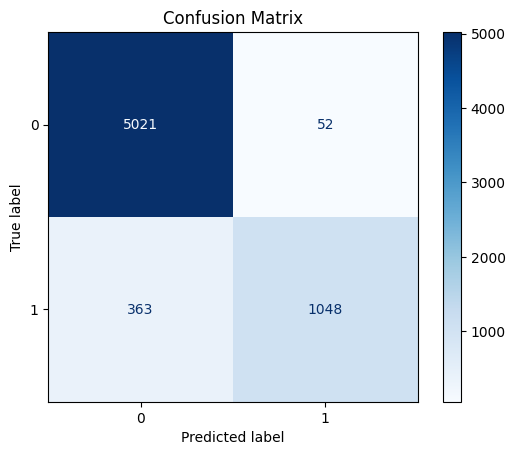

In [21]:
# Prédictions finales avec le meilleur modèle
y_pred = best_model.predict(X_test)
# === ÉVALUATION COMPLÈTE ===
print("=== BEST MODEL EVALUATION ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()



## 📊 Best Model Evaluation Results

The evaluation of the best-performing model yielded strong performance metrics on the test set:

### ✅ Accuracy
- **Overall Accuracy**: `0.936` (93.60%)

### 📋 Classification Report

| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
| 0 (Negative) | 0.93 | 0.99 | 0.96 | 5073 |
| 1 (Positive) | 0.95 | 0.74 | 0.83 | 1411 |


### 🔍 Confusion Matrix

|               | Predicted: 0 | Predicted: 1 |
|---------------|--------------|--------------|
| **Actual: 0** | 5021         | 52           |
| **Actual: 1** | 363          | 1048         |

### 📌 Insights
- The model performs exceptionally well at identifying **negative reviews** (Class 0), with **99% recall**.
- For **positive reviews** (Class 1), while precision is high (**0.95**), the **recall drops to 0.74**, suggesting the model misses a significant number of positive instances.


# Model Saving

After selecting the best model, we saved it for future use and deployment. The **XGBoostClassifier** was serialized and stored using the `joblib` library.


In [24]:
# Save the model
joblib.dump(best_model, 'XGBoostbest_model.pkl')


['XGBoostbest_model.pkl']

# Making Prediction With Saved Model


In [26]:
# Later: load the model
loaded_model = joblib.load('XGBoostbest_model.pkl')

# Predict using the loaded model
y_pred_loaded = loaded_model.predict(X_test)

In [27]:
# Créer un DataFrame avec les vraies et les prédites
results_df = pd.DataFrame({
    'Real Value': y_test,
    'Predicted Value': y_pred_loaded
})

# Afficher les premières lignes
results_df.head(10)

,Real Value,Predicted Value
20562,0,0
1090,1,1
4762,0,0
12381,0,0
15112,0,0
28192,0,0
32025,0,0
21596,0,0
30487,0,0
2119,0,0


In [28]:
results_df.to_csv("predictions_results.csv", index=False)


In this final step, we loaded the best-performing credit score prediction model and used it to generate predictions on the test dataset. We then compared the predicted values with the actual labels by creating a DataFrame, which allowed us to visually inspect the model's performance on a sample of test instances. To facilitate further analysis and reporting, the results were saved to a CSV file named `predictions_results.csv`.
